# Agents réflexe : avec et sans mémoire.

 
L’objectif de ce TD est l’exploration de deux agents réflexe : avec et sans mémoire :
- simple relex agent
- model based agent

Il est fourni avec trois fichiers squelettes agents.py,  vacuum_trivial.py, et vacuum_2d.py.
Ces fichiers ont été développés à base des codes Python fournis pour le livre Intelligence artificielle : une approche moderne (AIMA) https://github.com/aimacode/aima-python.  

Dans certaines questions, il vous est demandé de compléter des parties de codes. 

 #### Commençons par tout importer à partir du module agents.

In [ ]:
from util import  *  
from agents import *

In [ ]:
# Read the source code of the agent class
psource(Agent)
#psource(Thing)

In [ ]:
# print the set of action
print("Action disponible:")
print("===================")

for action in Action :
    print("Action." + action.name)
     
    

## Agent qui execute des actions aléatoires

Complétez le code de la fonction program pour implementer un agent qui choisi aléatoirement une action



In [ ]:
# print the source code of the RandomAgent class
psource(RandomAgent)

Implemetez une agent aspirateur un agent qui choisi aléatoirement une action  

In [ ]:
import random 

def RandomVacuumAgent(actions):
    return RandomAgent([Action.TurnRight, Action.TurnLeft,   Action.Grab])  

Testez votre code

In [ ]:
agent = RandomVacuumAgent([Action.Forward, Action.TurnLeft, Action.TurnRight])
agent.program("Nothing is seen")

## Simulation d'environnement

La classe Environnement modélise un environnement d'un agent. Elle a beaucoup de méthodes! Mais la plupart d'entre eux sont incroyablement simples, alors voyons ceux que nous utiliserons dans ce notebook.

- thing_classes(self) : renvoie un tableau statique de sous-classes Thing qui déterminent ce qui est autorisé dans l'environnement et ce qui ne l'est pas
- add_thing(self, thing, location=None) : ajoute une chose à l'environnement à l'emplacement
- run(self, steps) : exécute un environnement contenant l'agent pendant un nombre d'étapes donné.
- is_done(self) : renvoie vrai si l'objectif de l'agent et de l'environnement a été atteint

Les deux fonctions suivantes doivent être implémentées par chaque sous-classe d'Environnement pour que l'agent reçoive des perceptions et exécute des actions
- percept(self, agent) : étant donné un agent, cette méthode renvoie une liste de percepts que l'agent voit à l'heure actuelle
- execute_action(self, agent, action) : l'environnement réagit à une action effectuée par un agent donné. Les changements peuvent faire en sorte que l'agent expérimente de nouveaux percepts ou que d'autres éléments réagissent à l'entrée de l'agent.

In [45]:
#print the coude source of the Environement class
psource(Environment)

# I. Agent aspirateur trivial (1D)
La figure ci-dessous montre un agent  aspirateur dans un environment trivial : L’environnement a deux emplacements A et B, qui peuvent être soit ≪ propre (Clean) ≫ ou ≪ sale (Dirty) ≫. L’aspirateur a trois actions ≪ Changer d’emplacement (TurnRight/TurnLeft) ≫, ≪ Aspirer (Suck)≫. L’aspirateur nettoiera la saleté dés que possible, si non il se déplace vers l’autre emplacement.

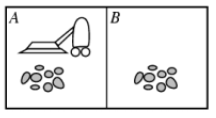

  

In [ ]:
# Declare a new action 'Suck' and two locations and two location properties  
Action.Suck = 'Suck'
loc_A = (0, 0)
loc_B = (1, 0)
Clean = 'Clean'
Dirty = 'Dirty'

In [ ]:
# Vacuum environment


class Dirt(Thing):
    pass

 

# ______________________________Trivial Environnement___________________________
###############################################################################
######################      A    ##     B      ################################
###############################################################################
######################     ~ ~   ##            ################################ 
######################    /0 0\  ##    **      ################################
######################   /|–^–|\ ##    **      ################################
######################  //|   |  ##            ################################ 
######################     O-O   ##            ################################
###############################################################################

  

class TrivialVacuumEnvironment(Environment):
    """This environment has two locations, A and B. Each can be Dirty
    or Clean. The agent perceives its location and the location's
    status. This serves as an example of how to implement a simple
    Environment."""

    def __init__(self):
        super().__init__()
        self.status = {loc_A: Dirty, loc_B: Dirty}

    def thing_classes(self):
        return [Wall, Dirt, Agent]

    def percept(self, agent):
        """Returns the agent's location, and the location status (Dirty/Clean)."""
        return agent.location, self.status[agent.location]

    def default_location(self, thing):
        """Agents start in either location at random."""
        return random.choice([loc_A, loc_B])

    def execute_action(self, agent, action):
        """Change agent's location and/or location's status; track performance.
        Score 100 for each dirt cleaned; -1 for each move."""
        if action == Action.Suck:
            if self.status[agent.location] == Dirty:
                agent.performance += 100
                self.status[agent.location] = Clean
            else:
                agent.performance -= 10
        if action == Action.TurnRight:
            agent.location = loc_B
            agent.performance -= 1
        if action == Action.TurnLeft:
            agent.location = loc_A
            agent.performance -= 1

        # ______________________________________________________________________________





# Quelle est la valeur de retour la fonction  percept?

 put your answer here:
 

## Agent à simple réflexe
Implementez un agent aspirateur à simple réflexe dont le programme est le suivant:


<code>program(percept):
    location, status <- percept
    if status is Dirty then
        return Suck
    else if I m in location A then
        return Go to location B
    else if I m in location B then
        return Go to location A
</code>
        


In [ ]:
# compléter le code  

def TrivialReflexVacuumAgent():
    """  A reflex agent for the two-state vacuum environment.""" 
    
    def program(percept):
        location, status = percept
        if status == Dirty:
            return Action.Suck
        elif location == loc_A:
            return  Action.TurnRight
        else:
            return  Action.TurnLeft  

    agent = Agent(program)
    agent.name = "Trivial Reflex Agent"
    return agent

## Testez votre Agent à simple réflexe

1. Lisez et executez le code de la cellele suivante
2. Commentez la ligne 4 et décommentez la ligne 5
3. Que fait la fonction TraceAgent
4. Modifier le code du programme précédent pour mettre à jour les performances de l'agent -1 pour chaque déménagement et 20 points pour chaque position nettoyée 

In [ ]:
 
environment = TrivialVacuumEnvironment()
print(environment.status ) 

agent =  TrivialReflexVacuumAgent()
environment.add_thing(agent) 

environment.run()
print(environment.status )
print("Is the job done?" , environment.status == {(1,0):'Clean' , (0,0) : 'Clean'})
print("agent performance:", agent.performance)

Pour une bone pratique de suivi de l'évolution d'un agent dans son environment<br> 
on ajoute une couche au  programme de l'agent pour afficher son entrée et sa sortie. 
       
Cela nous permettra de voir ce que l'agent fait dans l'environnement. 

In [ ]:
psource(TraceAgent)

In [ ]:
environment = TrivialVacuumEnvironment()
print(environment.status ) 
#agent = TrivialReflexVacuumAgent()
agent=  TraceAgent(TrivialReflexVacuumAgent()) 
environment.add_thing(agent) 
environment.run()

# Agent à simple réflexe basé sur modele 
Implementer un agent aspirateur à simple réflexe avec mémoire dont le programme est le suivant:


<code>program(percept):
    location, status <- percept
    if status is Dirty then
        memory[location] <- clean
        return Suck
    else if I m in location A then
        return Go to location B
    else if I m in location B then
        return Go to location A
    else if my memory tells me that both location A and B are clean then
        return NO_OP
</code>

#### Attention!
TrivialModelbasedReflexVacuumAgent est une drivée la classe Agent
        

In [ ]:
 
class TrivialModelbasedReflexVacuumAgent(Agent):
   
    def __init__(self):
        Agent.__init__(self)
        self.memory = [] 
        def newprogram(percept): 
            location, status = percept
            if status == Dirty:
                self.memory.append(location)
                return Action.Suck
            elif location == loc_A and not loc_B in self.memory:
                print(self.memory)
                return  Action.TurnRight
            elif not loc_A in self.memory:
                return  Action.TurnLeft
            else : 
                return Action.NoOp
        
        self.program = newprogram
    
    

## Testez votre Agent à simple réflexe avec mémoire et comparez ses performances avec le premier agent 



In [ ]:
environment = TrivialVacuumEnvironment()
print(environment.status ) 

#agent =  TrivialModelbasedReflexVacuumAgent()
agent=  TraceAgent(TrivialModelbasedReflexVacuumAgent()) 


environment.add_thing(agent) 

environment.run()
print(environment.status )
environment.status == {(1,0):'Clean' , (0,0) : 'Clean'}
print("agent performance:", agent.performance)

# sauvdardez ce fichier en format .py
1. download this file as pyhton (.py) File --> Download as --> pyhton
2. rename  the file to trivial_vacuum.py
3. move trivial_vacuum.py to td2 folder